In [3]:
import Pkg
using Pkg
Pkg.add("StatsPlots")
Pkg.add("CSV")
Pkg.add("DataFrames")
using StatsPlots
using CSV
using DataFrames

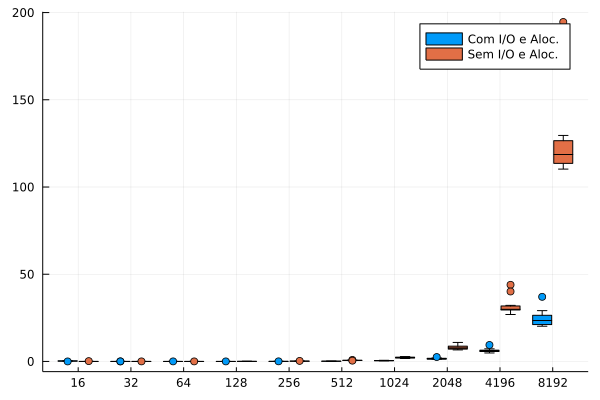

In [175]:
fullDataIO = CSV.read("../tests/seq/full.csv", DataFrame)
fullDataNoIO = CSV.read("../tests/seq/seahorse.csv", DataFrame)

x = repeat(["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"], outer=20)
v = []
w = []
for row in eachrow(fullDataIO)
    v = [v;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
end

for row in eachrow(fullDataNoIO)
    w = [w;row."16";row."32";row."64";row."128";row."256";row."512";row."1024";row."2048";row."4196";row."8192"]
end
y = [v;vec(w)]

groupedboxplot(x, y, bar_width = 0.8, group = repeat(["Com I/O e Aloc.", "Sem I/O e Aloc."], inner = 100))

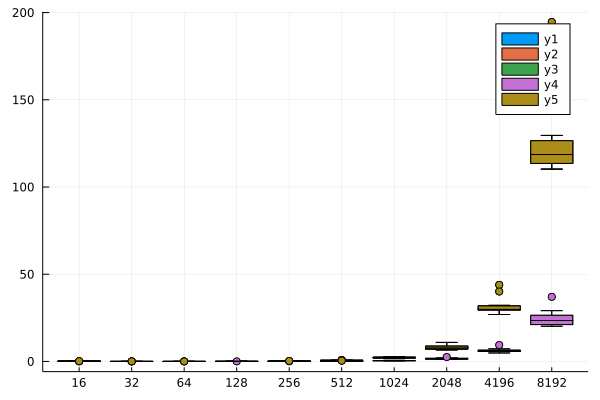

In [180]:
x = ["16", "32", "64", "128", "256", "512", "1024", "2048", "4196", "8192"]
groupedboxplot!(x, v, bar_width = 0.8)
groupedboxplot!(x, w, bar_width = 0.8)

In [7]:
xRand = rand(1:4, 100)
yRand = rand(200)

200-element Vector{Float64}:
 0.15197713436096727
 0.9900869692063379
 0.24477295550883826
 0.20474989783799158
 0.8023204125816263
 0.3772397905459992
 0.6016042334143861
 0.9853739117344011
 0.09730970652231163
 0.7371059763016312
 0.8267252148653899
 0.8432868300119825
 0.37333097161938156
 ⋮
 0.2841863793618602
 0.08069284792405207
 0.398395027198684
 0.45216339727417343
 0.8215567333048703
 0.885403837224011
 0.2882376827772164
 0.005096926548548764
 0.5708411829011641
 0.4535640127689198
 0.0010195981215717076
 0.2003771083537247

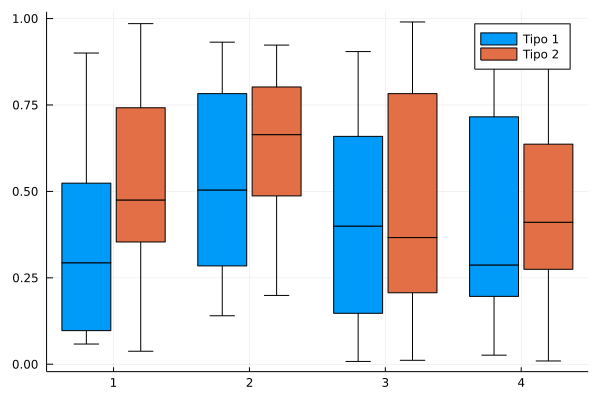

In [91]:
g=vcat(fill("Tipo 1", 1), fill("Tipo 2", 1))
groupedboxplot(xRand, yRand, group=gr)